# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import tkinter as tk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt  # Import for plotting
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  # Import to embed plot in Tkinter
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('logistic.csv')

In [288]:
dataset.head(10)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,22,25,14,4,27,598,9,1
1,41,28,28,7,13,584,20,0
2,47,27,10,2,29,757,21,0
3,35,9,12,5,17,232,18,0
4,53,58,24,9,2,533,18,0
5,30,41,14,10,10,500,29,0
6,47,37,15,9,28,574,14,1
7,54,36,11,0,18,323,16,0
8,36,20,5,10,8,687,8,0
9,65,8,4,2,23,995,10,0


In [289]:
dataset.info

<bound method DataFrame.info of        Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22      25               14              4             27   
1       41      28               28              7             13   
2       47      27               10              2             29   
3       35       9               12              5             17   
4       53      58               24              9              2   
...    ...     ...              ...            ...            ...   
64369   45      33               12              6             21   
64370   37       6                1              5             22   
64371   25      39               14              8             30   
64372   50      18               19              7             22   
64373   52      45               15              9             25   

       Total Spend  Last Interaction  Churn  
0              598                 9      1  
1              584                20      0  
2

### Getting the inputs and output

In [290]:
#X1 = dataset.iloc[:,1:2].values
#X2 = dataset.iloc[:,3:7].values
#X3 = dataset.iloc[:,9:11].values
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [291]:
X

array([[ 22,  25,  14, ...,  27, 598,   9],
       [ 41,  28,  28, ...,  13, 584,  20],
       [ 47,  27,  10, ...,  29, 757,  21],
       ...,
       [ 25,  39,  14, ...,  30, 327,  20],
       [ 50,  18,  19, ...,  22, 540,  13],
       [ 52,  45,  15, ...,  25, 696,  22]])

In [292]:
y

array([1, 0, 0, ..., 1, 1, 1])

### Creating the Training Set and the Test Set

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [294]:
X_train

array([[ 38,  18,  24, ...,  14, 630,   4],
       [ 57,  32,   4, ...,   7, 341,  23],
       [ 30,  42,  13, ...,  30, 965,   9],
       ...,
       [ 19,  22,  10, ...,  10, 800,  29],
       [ 59,  46,   2, ...,  11, 135,  28],
       [ 34,  31,  30, ...,  21, 165,  30]])

In [295]:
X_test

array([[ 32,   8,  30, ...,  17, 246,   5],
       [ 50,  38,  30, ...,  27, 846,  23],
       [ 51,  30,  16, ...,  22, 277,   4],
       ...,
       [ 38,  57,   6, ...,  26, 108,  12],
       [ 18,  58,  19, ...,   4, 842,  24],
       [ 25,  34,  26, ...,   1, 256,   3]])

In [296]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [297]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

### Feature Scaling

In [298]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [299]:
X_train

array([[-2.86459005e-01, -8.16992933e-01,  1.01651676e+00, ...,
        -3.54270968e-01,  3.41705088e-01, -1.33227942e+00],
       [ 1.07673595e+00,  8.40535878e-04, -1.25151101e+00, ...,
        -1.14480407e+00, -7.65459080e-01,  8.69039570e-01],
       [-8.60435828e-01,  5.85007299e-01, -2.30898518e-01, ...,
         1.45266184e+00,  1.62509608e+00, -7.52984949e-01],
       ...,
       [-1.64965396e+00, -5.83326228e-01, -5.71102684e-01, ...,
        -8.06004170e-01,  9.92978128e-01,  1.56419294e+00],
       [ 1.22023016e+00,  8.18674005e-01, -1.47831379e+00, ...,
        -6.93070870e-01, -1.55464876e+00,  1.44833404e+00],
       [-5.73447417e-01, -5.75761405e-02,  1.69692509e+00, ...,
         4.36262136e-01, -1.43971823e+00,  1.68005183e+00]])

## Part 2 - Building and training the model

### Building the model

In [300]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [301]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [302]:
y_pred = model.predict(sc.transform(X_test))

In [303]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

## Part 3: Evaluating the model 

### Confusion Matrix

In [304]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5503, 1251],
       [1154, 4967]])

### Accuracy

In [305]:
(5503+4967)/(5503+4967+1154+1251)

0.8132038834951456

In [306]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8132038834951456

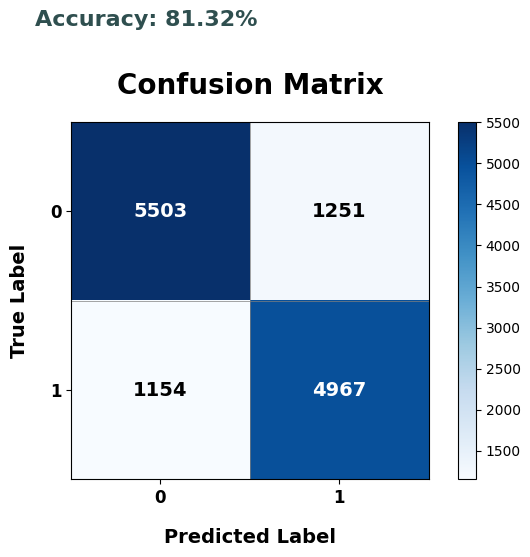

In [307]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_test and y_pred are defined earlier in your code
# y_test = [...]  # Your true labels
# y_pred = [...]  # Your predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


# Imporatance of Variable by Accuracy

* Testing the accuracy of individual variables when it comes to churn prediction


## Age

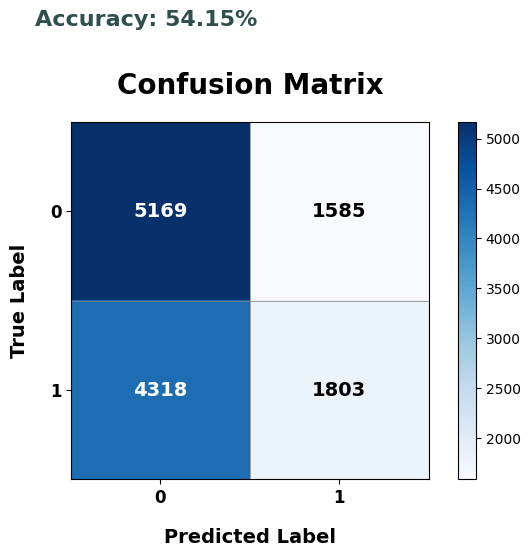

In [308]:
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Tenure

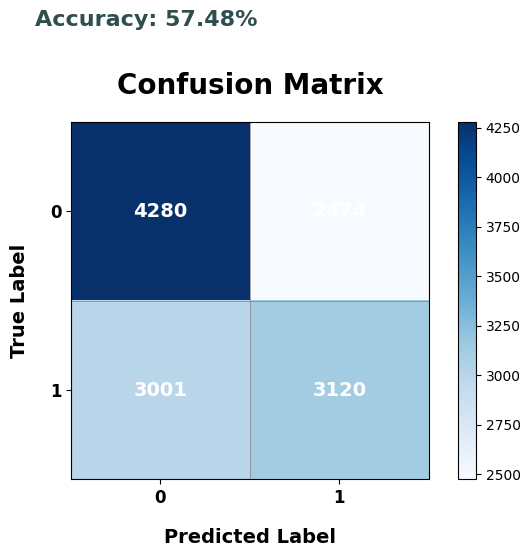

In [309]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Usage Frequency

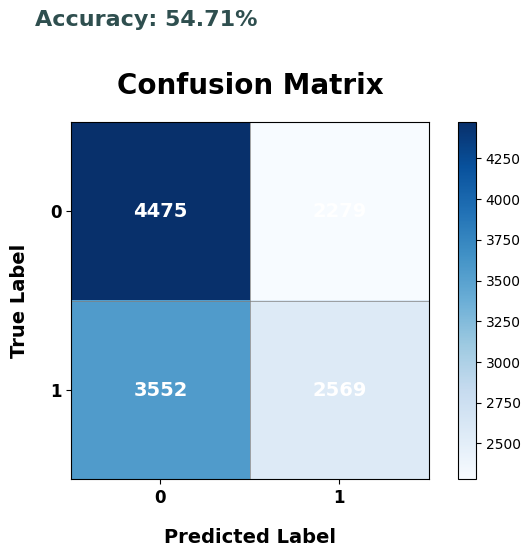

In [310]:
X = dataset.iloc[:,2:3].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Support Calls

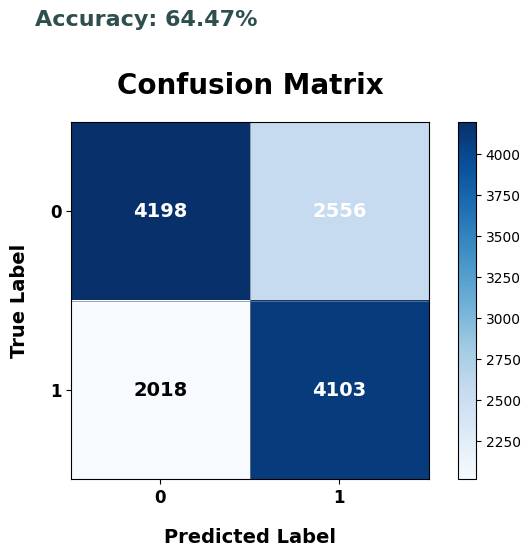

In [311]:
X = dataset.iloc[:,3:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Payment Delay

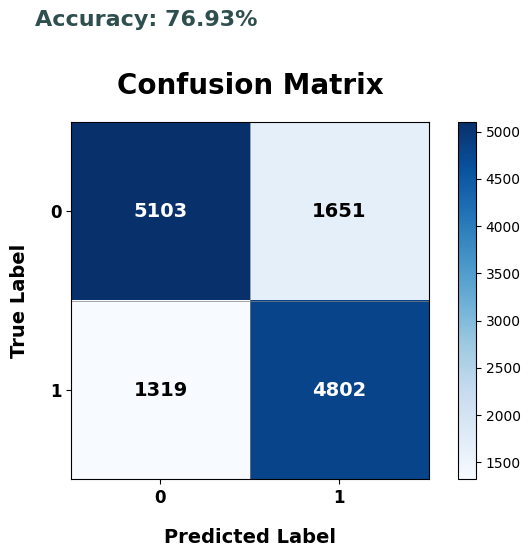

In [312]:
X = dataset.iloc[:,4:5].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Total Spent

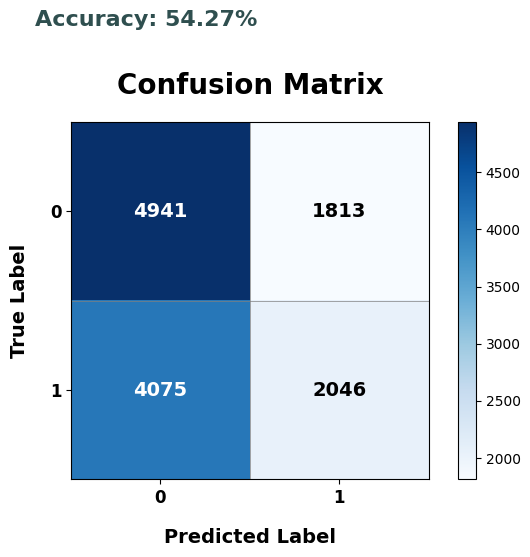

In [313]:
X = dataset.iloc[:,5:6].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

## Last Interaction

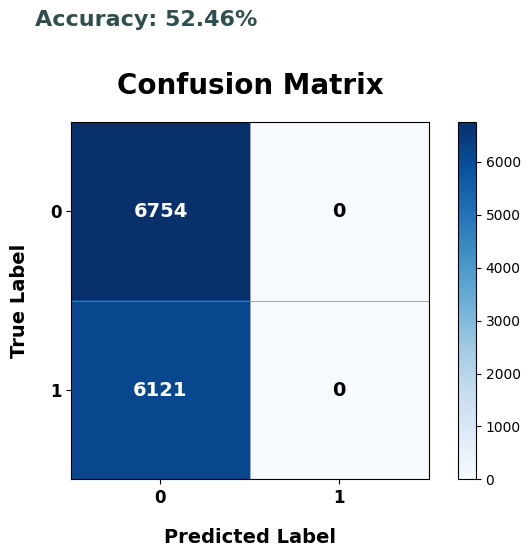

In [314]:
X = dataset.iloc[:,6:7].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
model.fit(X_train, y_train)
y_pred = model.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix with a more refined color map and style
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20, weight='bold', pad=20)
plt.suptitle(f'Accuracy: {accuracy:.2f}%', fontsize=16, color='darkslategray', weight='bold', y=0.92)

# Define tick marks based on the number of unique classes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')
plt.yticks(tick_marks, np.unique(y_test), fontsize=12, weight='bold')

# Set labels for the axes with bold fonts
plt.ylabel('True Label', fontsize=14, weight='bold', labelpad=15)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', labelpad=15)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black',
             fontsize=14, fontweight='bold')

# Customize color bar for a subtle, integrated look
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Minor gridlines for a polished separation of cells
plt.gca().set_xticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.gca().set_yticks(np.arange(-.5, len(tick_marks)), minor=True)
plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(which='minor', bottom=False, left=False)  # Hide minor ticks

# Adjust layout for a clean, professional look
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()